# Lead Score - Case Study

###Importing basic libraries needed


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

###Configure Pandas display options

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
pd.options.display.float_format = '{:.2f}'.format
pd.set_option("display.expand_frame_repr", False)

### Importing Data


In [ ]:
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


###Getting insight from dataset

In [ ]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [ ]:
lead_df.shape

(9240, 37)

In [ ]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [ ]:
lead_df.duplicated().sum()

0

**Insights**
* A large number of columns have null values. This columns should be dropped


* `Prospect ID` and `Lead Number` both are both distinctive identifiers. so we can drop `Prospect ID`


* Few categorical columns have "Select" in their entries. This select are essentially null values because Select appears when someone does not select anything from the dropdown

* Column names are just too long. We will modify the column names


###Cleaning the dataframe



### Rename column names

- Long column names make analysis little difficult as one has to always refer to column names. Also has impact on charts created later on so lets makes some changes in column name for better understanding.

In [ ]:
lead_df.columns = lead_df.columns.str.replace(' ', '_').str.lower()
lead_df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

### Making names short to understand it while analysing

In [ ]:
lead_df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website',
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason',
                    'receive_more_updates_about_our_courses': 'courses_updates',
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

lead_df.head(1)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,source,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,tags,lead_quality,supply_chain_content_updates,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified


In [ ]:
lead_df = lead_df.applymap(lambda s:s.lower() if type(s) == str else s)

#### Replacing "select" category with null values

In [ ]:
lead_df = lead_df.replace('select',np.nan)

###No of Unique values in column

In [ ]:
lead_df.nunique()

prospect_id                     9240
lead_number                     9240
lead_origin                        5
lead_source                       20
do_not_email                       2
do_not_call                        2
converted                          2
total_visits                      41
time_on_website                 1731
page_views_per_visit             114
last_activity                     17
country                           38
specialization                    18
source                             9
occupation                         6
course_selection_reason            3
search                             2
magazine                           1
newspaper_article                  2
x_education_forums                 2
newspaper                          2
digital_advertisement              2
through_recommendations            2
courses_updates                    1
tags                              26
lead_quality                       5
supply_chain_content_updates       1
d

In [ ]:
lead_df1= lead_df.drop(['magazine','courses_updates','cheque_payment','dm_content_updates','supply_chain_content_updates'],axis=1)

In [ ]:
round(100*(lead_df1.isnull().sum()/len(lead_df1.index)), 2)

prospect_id                    0.00
lead_number                    0.00
lead_origin                    0.00
lead_source                    0.39
do_not_email                   0.00
do_not_call                    0.00
converted                      0.00
total_visits                   1.48
time_on_website                0.00
page_views_per_visit           1.48
last_activity                  1.11
country                       26.63
specialization                36.58
source                        78.46
occupation                    29.11
course_selection_reason       29.32
search                         0.00
newspaper_article              0.00
x_education_forums             0.00
newspaper                      0.00
digital_advertisement          0.00
through_recommendations        0.00
tags                          36.29
lead_quality                  51.59
lead_profile                  74.19
city                          39.71
asymmetrique_activity_index   45.65
asymmetrique_profile_index  

### Removing all columns with more than 35% of null values

In [ ]:
lead_df2 = lead_df1.drop(['source', 'city', 'lead_quality',
                'lead_profile', 'asymmetrique_activity_index',
                'asymmetrique_profile_index','asymmetrique_activity_score',
                'asymmetrique_profile_score','tags' ],axis=1)

lead_df2.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,occupation,course_selection_reason,search,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.00,0,0.00,page visited on website,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.00,674,2.50,email opened,india,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.00,1532,2.00,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.00,305,1.00,unreachable,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.00,1428,1.00,converted to lead,india,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [ ]:
lead_df2.shape

(9240, 23)

### Confirming the null values percentage

In [ ]:
round(100*(lead_df2.isnull().sum()/len(lead_df2.index)), 2)

prospect_id                0.00
lead_number                0.00
lead_origin                0.00
lead_source                0.39
do_not_email               0.00
do_not_call                0.00
converted                  0.00
total_visits               1.48
time_on_website            0.00
page_views_per_visit       1.48
last_activity              1.11
country                   26.63
specialization            36.58
occupation                29.11
course_selection_reason   29.32
search                     0.00
newspaper_article          0.00
x_education_forums         0.00
newspaper                  0.00
digital_advertisement      0.00
through_recommendations    0.00
mastering_interview        0.00
last_notable_activity      0.00
dtype: float64

###There are a more no. of null values in 4 columns as seen above. But removing those rows with the null value will cost us a lot of imbalance in data and they are important columns. So, instead of removing we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.

In [ ]:
lead_df2.specialization = lead_df2.specialization.fillna('not provided')
lead_df2.course_selection_reason = lead_df2.course_selection_reason.fillna('not provided')
lead_df2.country = lead_df2.country.fillna('not provided')
lead_df2.occupation = lead_df2.occupation.fillna('not provided')
lead_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   prospect_id              9240 non-null   object 
 1   lead_number              9240 non-null   int64  
 2   lead_origin              9240 non-null   object 
 3   lead_source              9204 non-null   object 
 4   do_not_email             9240 non-null   object 
 5   do_not_call              9240 non-null   object 
 6   converted                9240 non-null   int64  
 7   total_visits             9103 non-null   float64
 8   time_on_website          9240 non-null   int64  
 9   page_views_per_visit     9103 non-null   float64
 10  last_activity            9137 non-null   object 
 11  country                  9240 non-null   object 
 12  specialization           9240 non-null   object 
 13  occupation               9240 non-null   object 
 14  course_selection_reason 

###Rechecking the null percentage

In [ ]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)

prospect_id               0.00
lead_number               0.00
lead_origin               0.00
lead_source               0.39
do_not_email              0.00
do_not_call               0.00
converted                 0.00
total_visits              1.48
time_on_website           0.00
page_views_per_visit      1.48
last_activity             1.11
country                   0.00
specialization            0.00
occupation                0.00
course_selection_reason   0.00
search                    0.00
newspaper_article         0.00
x_education_forums        0.00
newspaper                 0.00
digital_advertisement     0.00
through_recommendations   0.00
mastering_interview       0.00
last_notable_activity     0.00
dtype: float64

In [ ]:
lead_df2.country.value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

###Keeping data upto mark for better understanding

In [ ]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead_df2.country = lead_df2.apply(lambda x:slots(x['country']), axis = 1)
lead_df2.country.value_counts()

india            6492
not provided     2461
outside india     287
Name: country, dtype: int64

In [ ]:
round(100*(lead_df2.isnull().sum()/len(lead_df2.index)), 2)

prospect_id               0.00
lead_number               0.00
lead_origin               0.00
lead_source               0.39
do_not_email              0.00
do_not_call               0.00
converted                 0.00
total_visits              1.48
time_on_website           0.00
page_views_per_visit      1.48
last_activity             1.11
country                   0.00
specialization            0.00
occupation                0.00
course_selection_reason   0.00
search                    0.00
newspaper_article         0.00
x_education_forums        0.00
newspaper                 0.00
digital_advertisement     0.00
through_recommendations   0.00
mastering_interview       0.00
last_notable_activity     0.00
dtype: float64

### Checking the percent of lose if the null values are removed

In [ ]:
round(100*(sum(lead_df2.isnull().sum(axis=1) > 1)/lead_df2.shape[0]),2)

1.48

In [ ]:
lead_df3 = lead_df2[lead_df2.isnull().sum(axis=1) <1]

In [ ]:
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [ ]:
round(100*(df3.isnull().sum()/len(df3.index)), 2)

prospect_id               0.00
lead_number               0.00
lead_origin               0.00
lead_source               0.00
do_not_email              0.00
do_not_call               0.00
converted                 0.00
total_visits              0.00
time_on_website           0.00
page_views_per_visit      0.00
last_activity             0.00
country                   0.00
specialization            0.00
occupation                0.00
course_selection_reason   0.00
search                    0.00
newspaper_article         0.00
x_education_forums        0.00
newspaper                 0.00
digital_advertisement     0.00
through_recommendations   0.00
mastering_interview       0.00
last_notable_activity     0.00
dtype: float64

In [ ]:
for column in df3:
    print(df3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: prospect_id, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
579533    1
630088    1
630039    1
630041    1
630042    1
         ..
602403    1
602402    1
602392    1
602388    1
660737    1
Name: lead_number, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: le

###Droping one of the primary column

In [ ]:
lead_df_final = lead_df3.drop('prospect_id',1)
lead_df_final.shape

(9074, 22)

### Univariate Analysis for Categorical Variable

In [ ]:
lead_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lead_number              9074 non-null   int64  
 1   lead_origin              9074 non-null   object 
 2   lead_source              9074 non-null   object 
 3   do_not_email             9074 non-null   object 
 4   do_not_call              9074 non-null   object 
 5   converted                9074 non-null   int64  
 6   total_visits             9074 non-null   float64
 7   time_on_website          9074 non-null   int64  
 8   page_views_per_visit     9074 non-null   float64
 9   last_activity            9074 non-null   object 
 10  country                  9074 non-null   object 
 11  specialization           9074 non-null   object 
 12  occupation               9074 non-null   object 
 13  course_selection_reason  9074 non-null   object 
 14  search                  

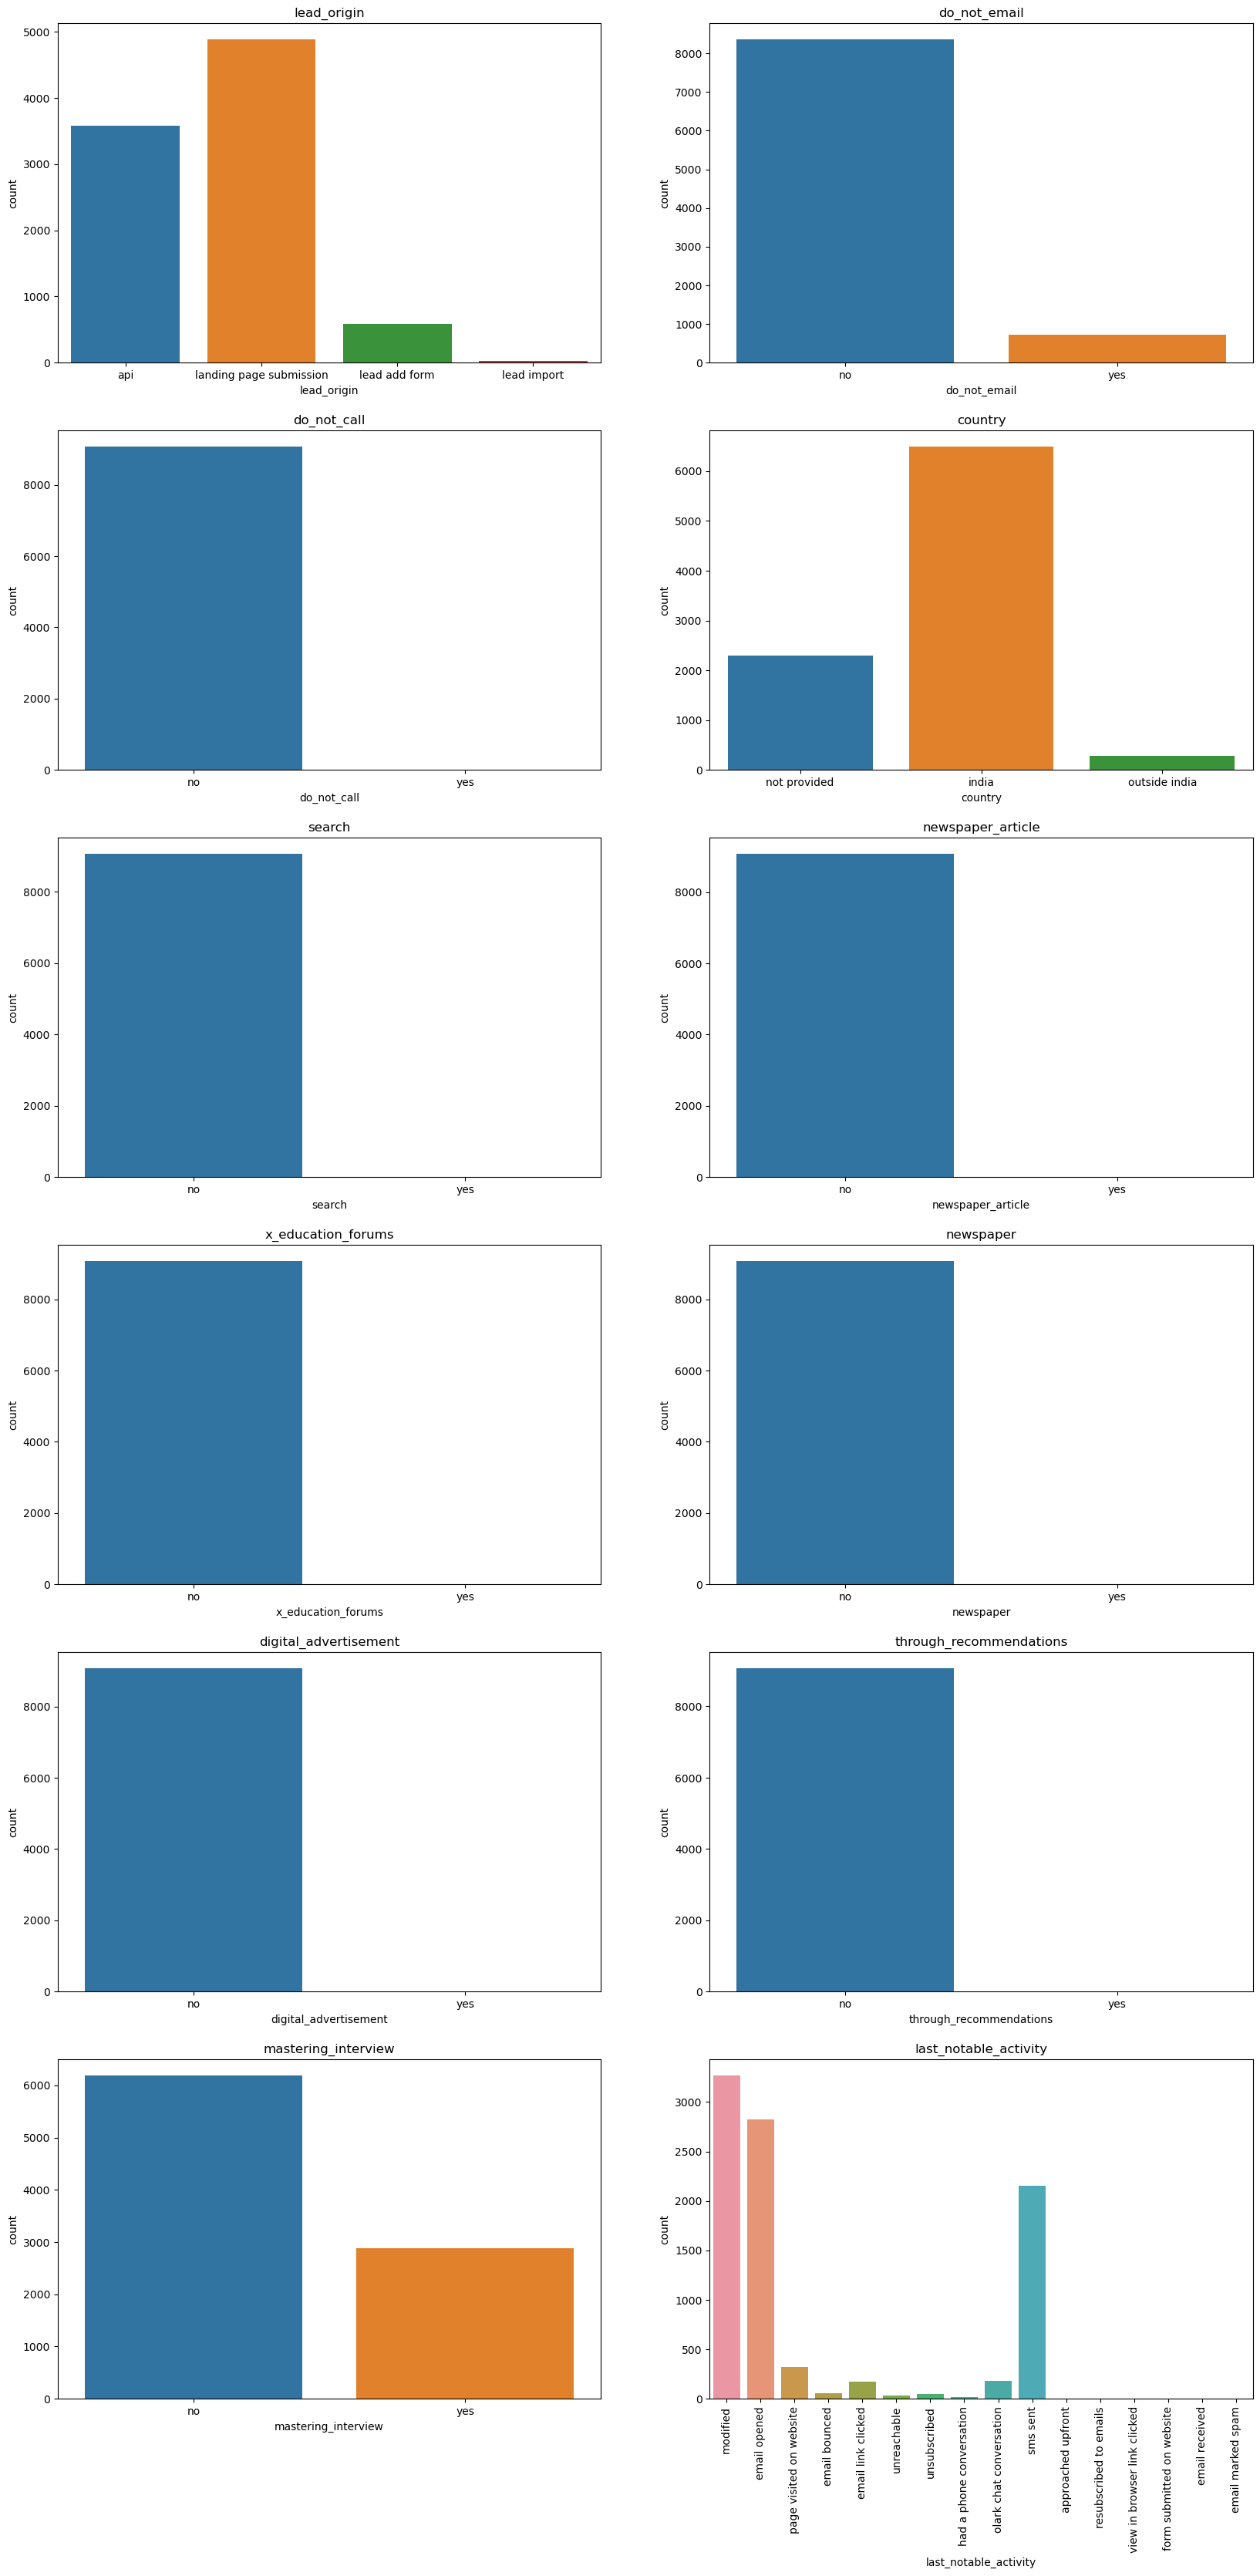

In [ ]:
plt.figure(figsize = (20,40))
plt.subplot(6,2,1)
sns.countplot(lead_df_final['lead_origin'])
plt.title('lead_origin')

plt.subplot(6,2,2)
sns.countplot(lead_df_final['do_not_email'])
plt.title('do_not_email')

plt.subplot(6,2,3)
sns.countplot(lead_df_final['do_not_call'])
plt.title('do_not_call')

plt.subplot(6,2,4)
sns.countplot(lead_df_final['country'])
plt.title('country')

plt.subplot(6,2,5)
sns.countplot(lead_df_final['search'])
plt.title('search')

plt.subplot(6,2,6)
sns.countplot(lead_df_final['newspaper_article'])
plt.title('newspaper_article')

plt.subplot(6,2,7)
sns.countplot(lead_df_final['x_education_forums'])
plt.title('x_education_forums')

plt.subplot(6,2,8)
sns.countplot(lead_df_final['newspaper'])
plt.title('newspaper')

plt.subplot(6,2,9)
sns.countplot(lead_df_final['digital_advertisement'])
plt.title('digital_advertisement')

plt.subplot(6,2,10)
sns.countplot(lead_df_final['through_recommendations'])
plt.title('through_recommendations')

plt.subplot(6,2,11)
sns.countplot(lead_df_final['mastering_interview'])
plt.title('mastering_interview')

plt.subplot(6,2,12)
sns.countplot(lead_df_final['last_notable_activity']).tick_params(axis='x', rotation = 90)
plt.title('last_notable_activity')

plt.show()

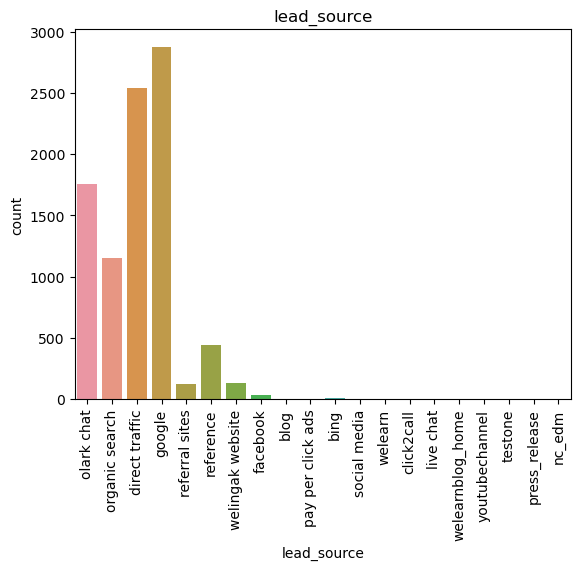

In [ ]:
sns.countplot(lead_df_final['lead_source']).tick_params(axis='x', rotation = 90)
plt.title('lead_source')
plt.show()

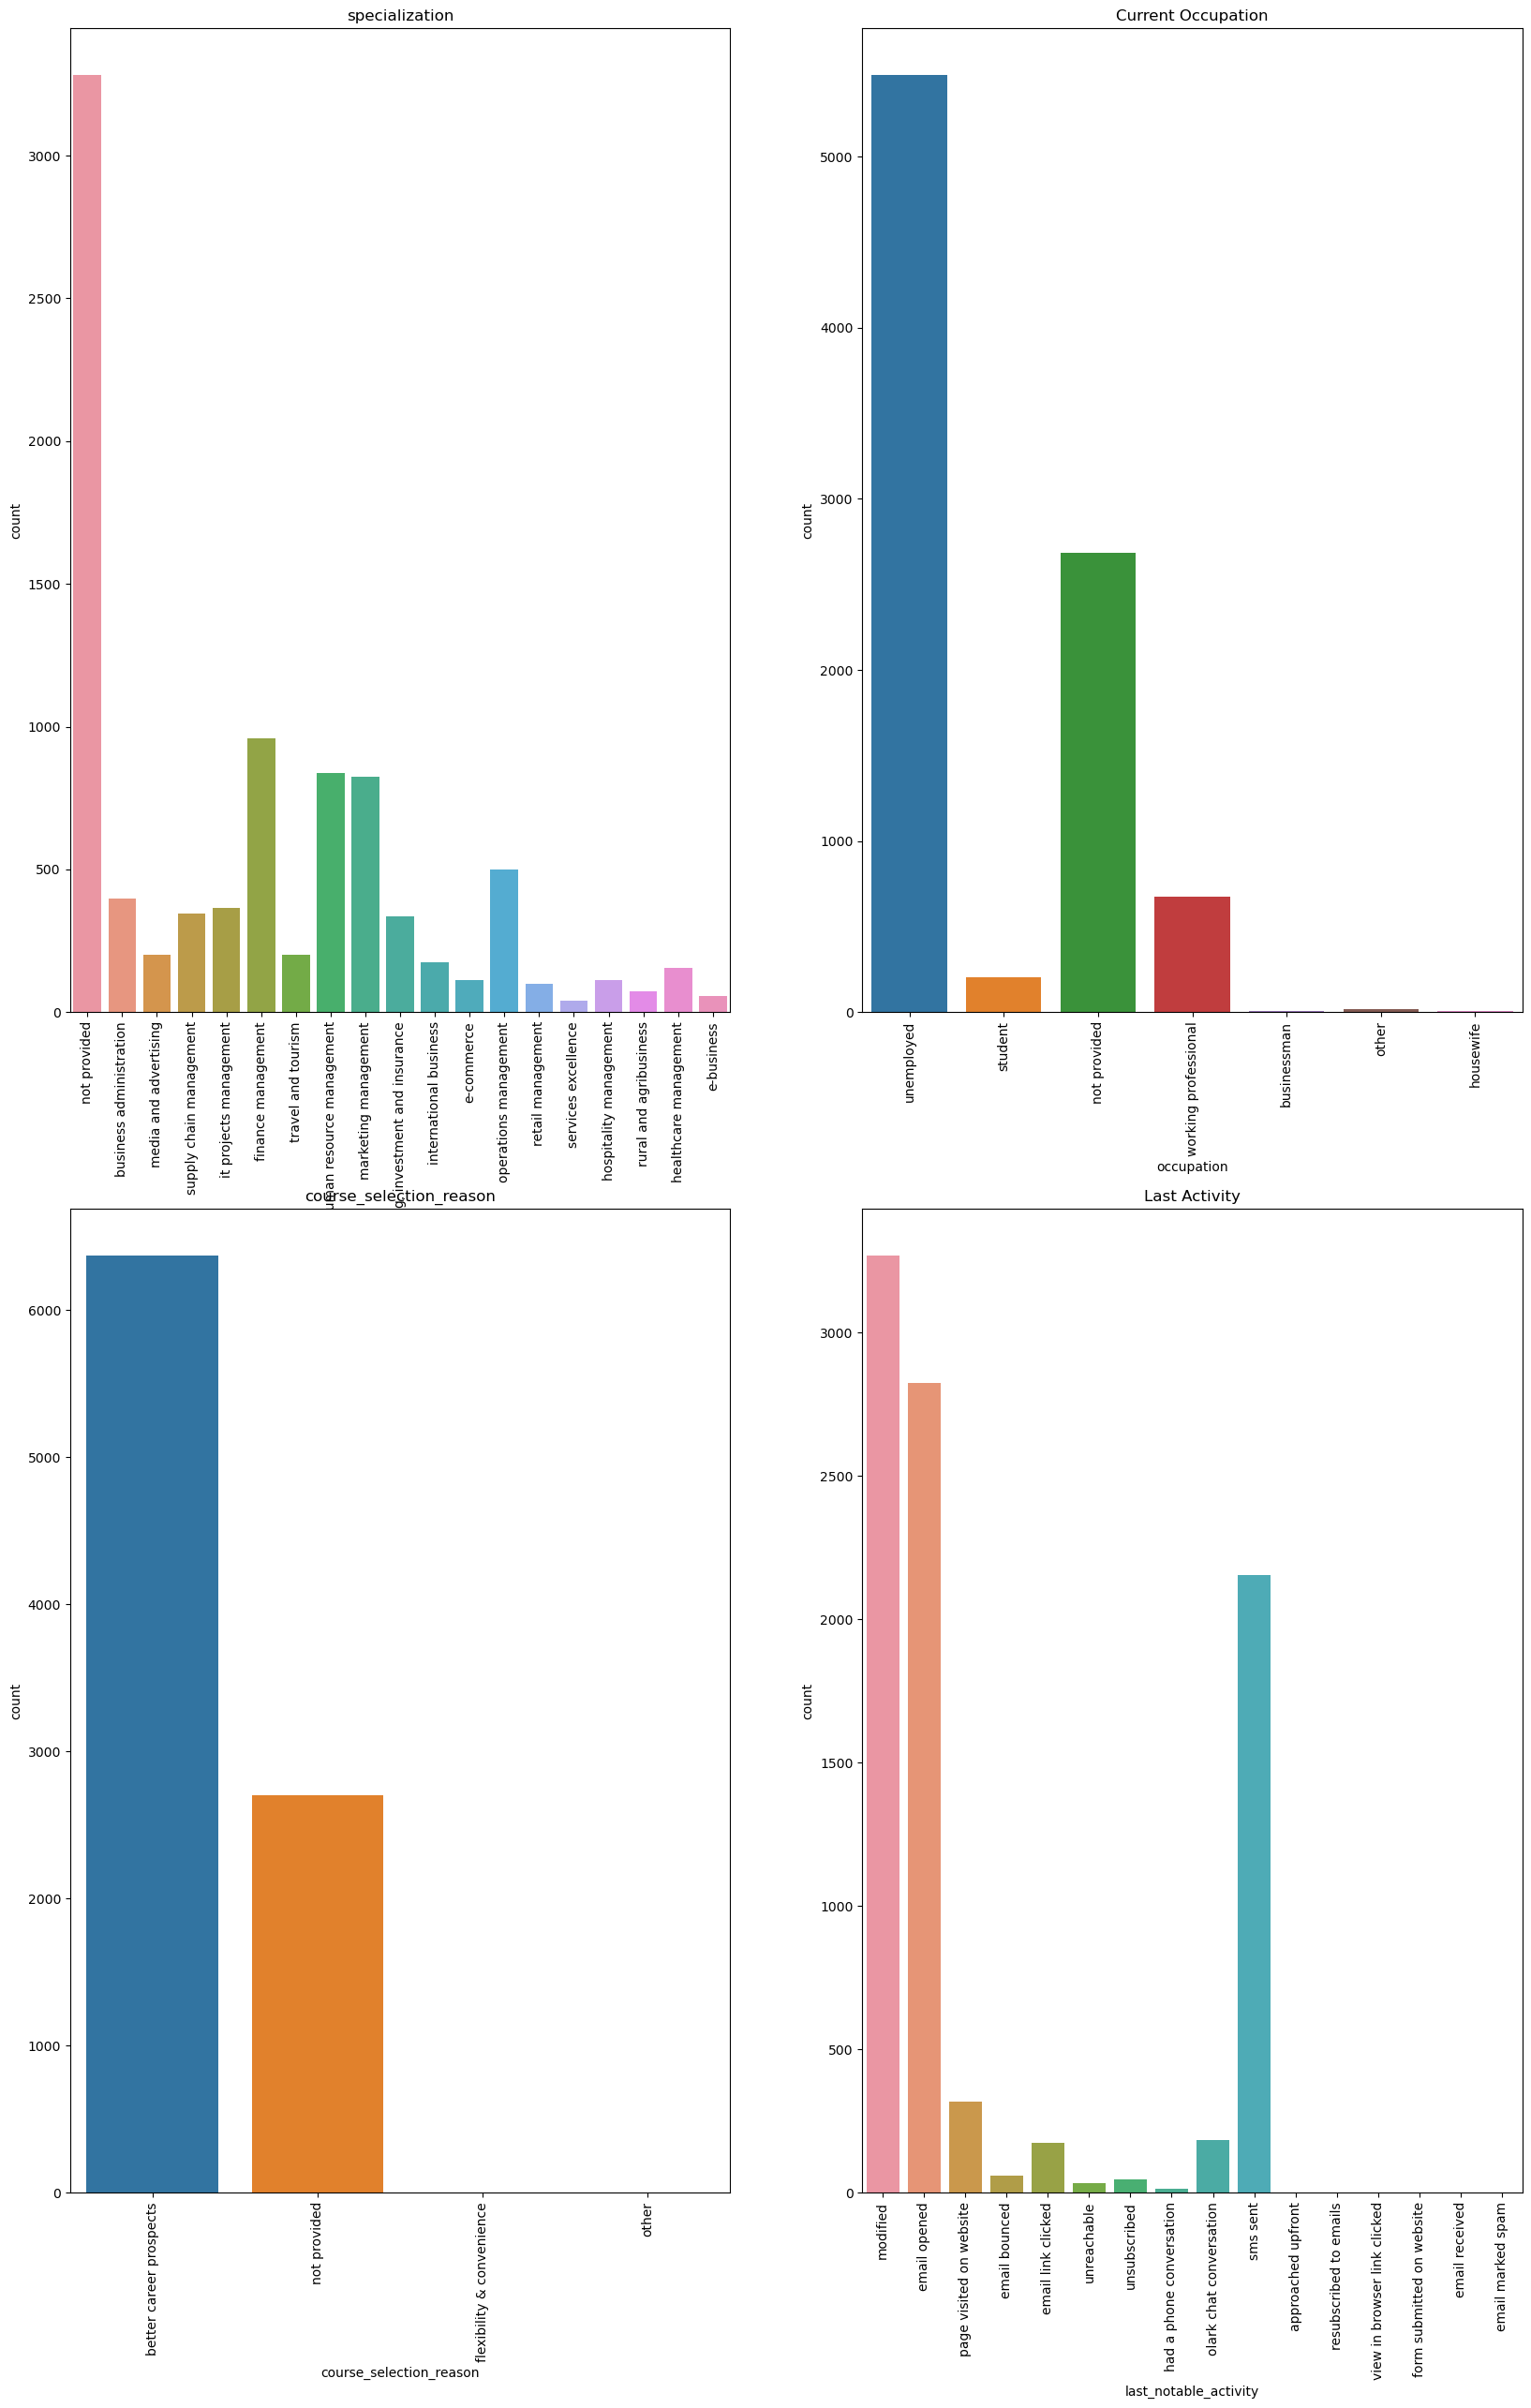

In [ ]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(lead_df_final['specialization']).tick_params(axis='x', rotation = 90)
plt.title('specialization')

plt.subplot(2,2,2)
sns.countplot(lead_df_final['occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(2,2,3)
sns.countplot(lead_df_final['course_selection_reason']).tick_params(axis='x', rotation = 90)
plt.title('course_selection_reason')

plt.subplot(2,2,4)
sns.countplot(lead_df_final['last_notable_activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()

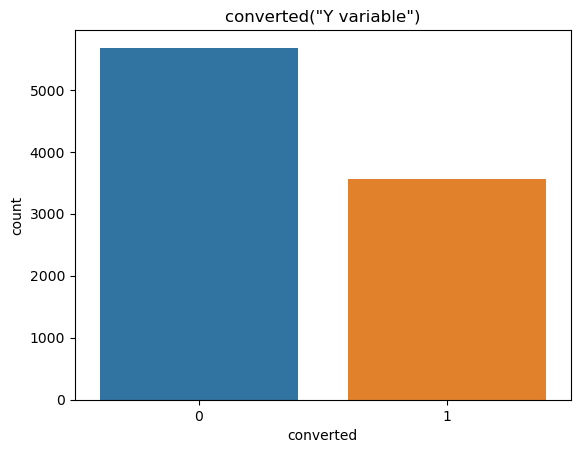

In [ ]:
sns.countplot(lead_df['converted'])
plt.title('converted("Y variable")')

plt.show()

### Univariate Analysis for Numerical Variables

In [ ]:
lead_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lead_number              9074 non-null   int64  
 1   lead_origin              9074 non-null   object 
 2   lead_source              9074 non-null   object 
 3   do_not_email             9074 non-null   object 
 4   do_not_call              9074 non-null   object 
 5   converted                9074 non-null   int64  
 6   total_visits             9074 non-null   float64
 7   time_on_website          9074 non-null   int64  
 8   page_views_per_visit     9074 non-null   float64
 9   last_activity            9074 non-null   object 
 10  country                  9074 non-null   object 
 11  specialization           9074 non-null   object 
 12  occupation               9074 non-null   object 
 13  course_selection_reason  9074 non-null   object 
 14  search                  

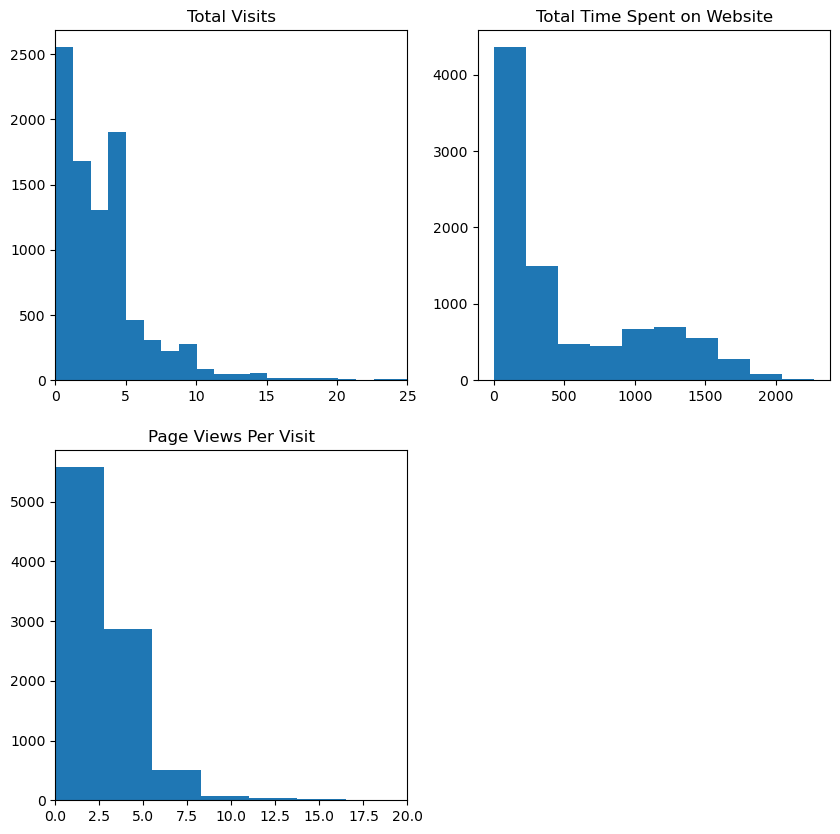

In [ ]:
plt.figure(figsize = (10,10))

plt.subplot(221)
plt.hist(lead_df_final['total_visits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_df_final['time_on_website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_df_final['page_views_per_visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()

### Comparing all the categorical variables to Converted

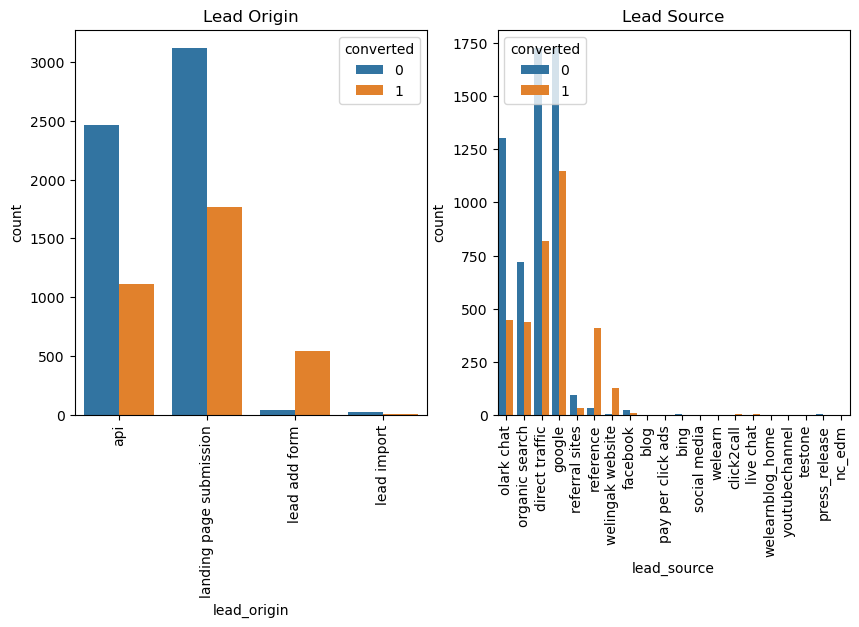

In [ ]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='lead_origin', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='lead_source', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

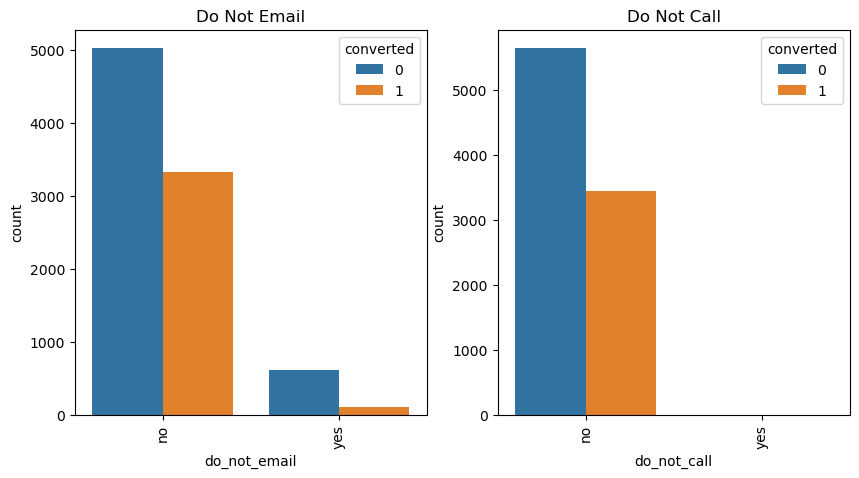

In [ ]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='do_not_email', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='do_not_call', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.show()

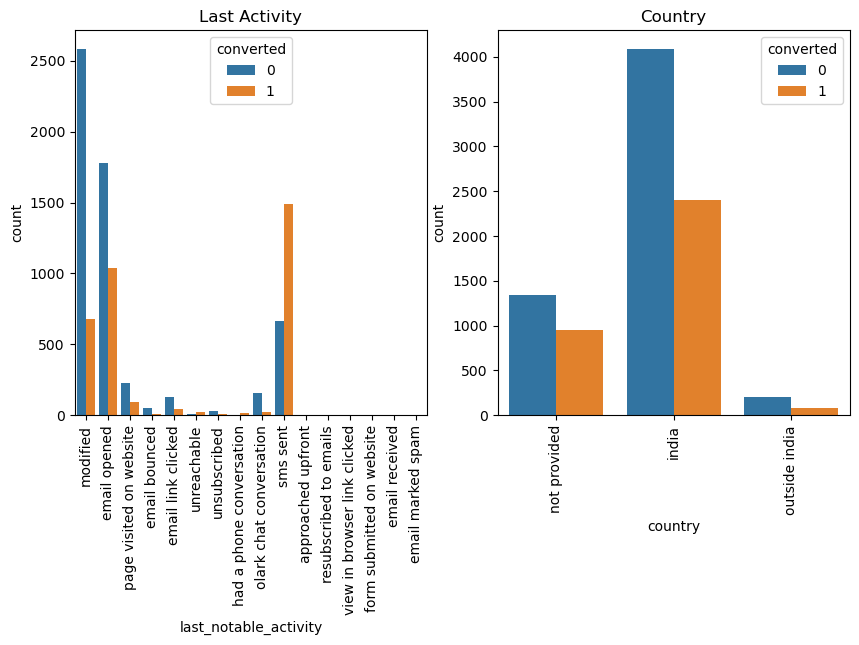

In [ ]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='last_notable_activity', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='country', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.show()

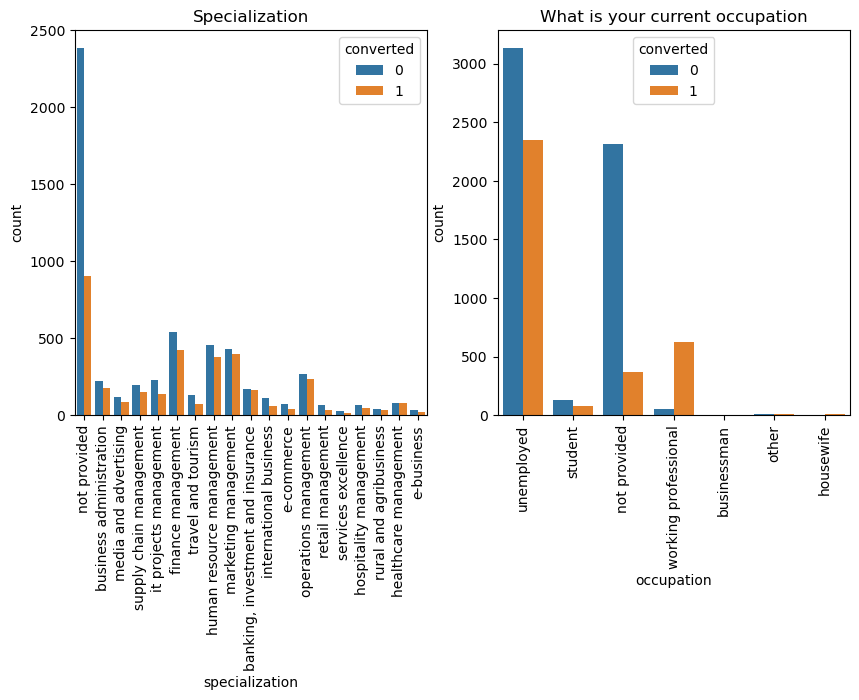

In [ ]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='specialization', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='occupation', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.show()

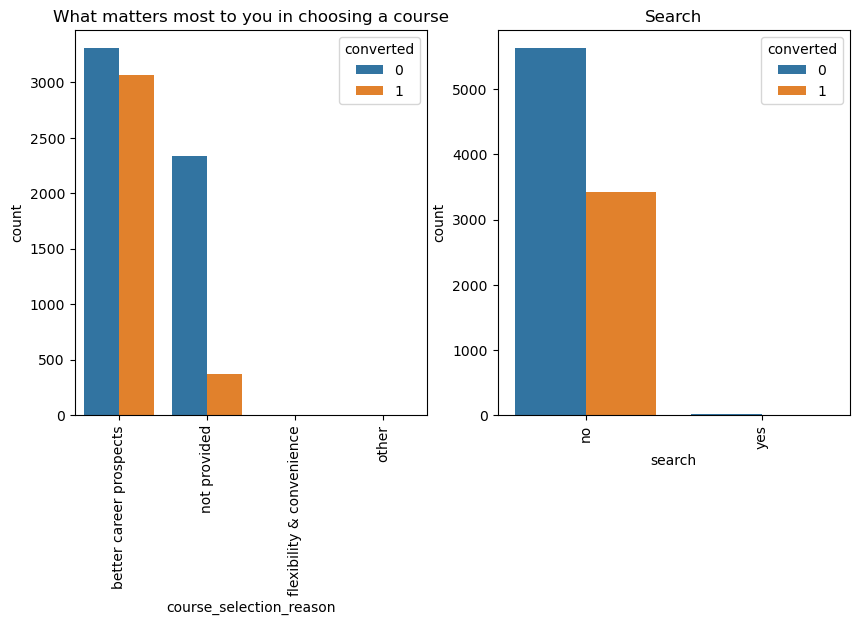

In [ ]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='course_selection_reason', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='search', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.show()

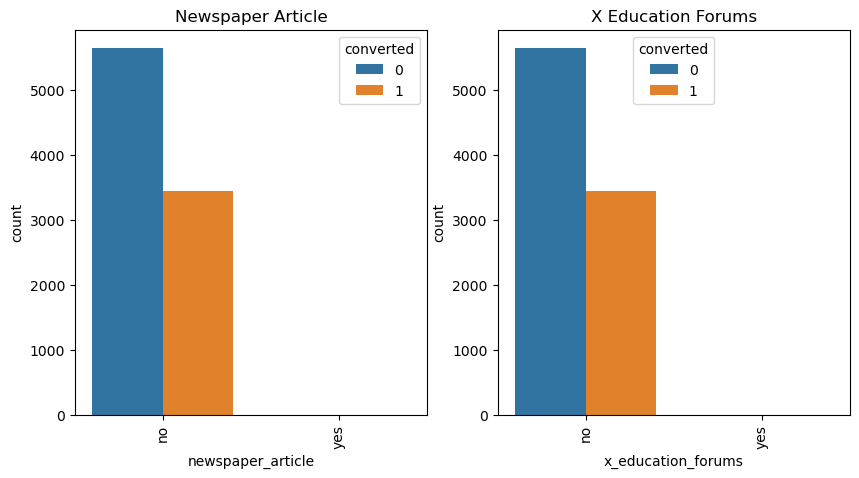

In [ ]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='newspaper_article', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='x_education_forums', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.show()

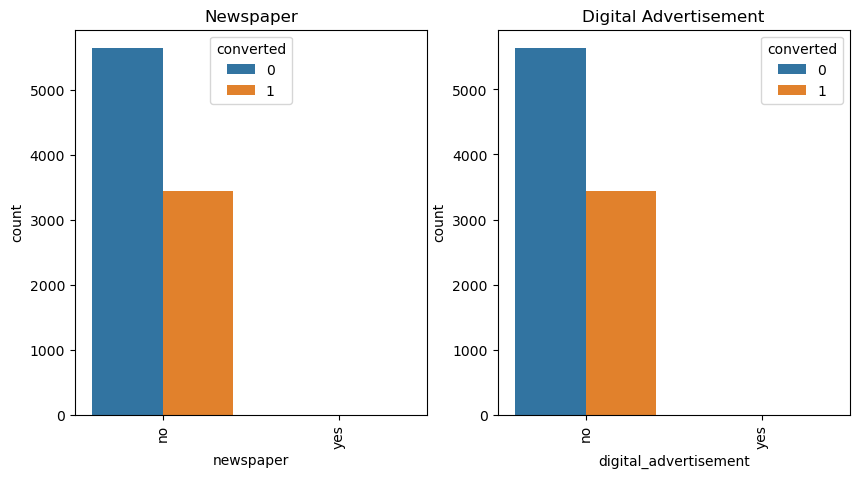

In [ ]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='newspaper', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='digital_advertisement', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.show()

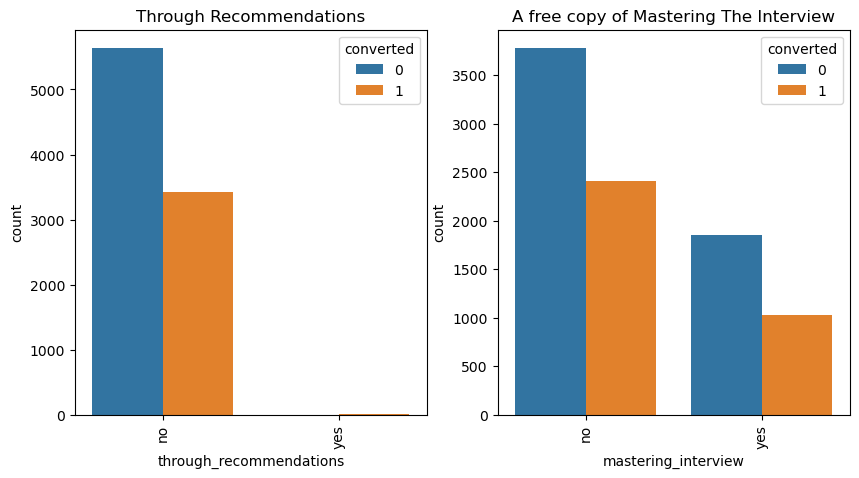

In [ ]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='through_recommendations', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='mastering_interview', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.show()

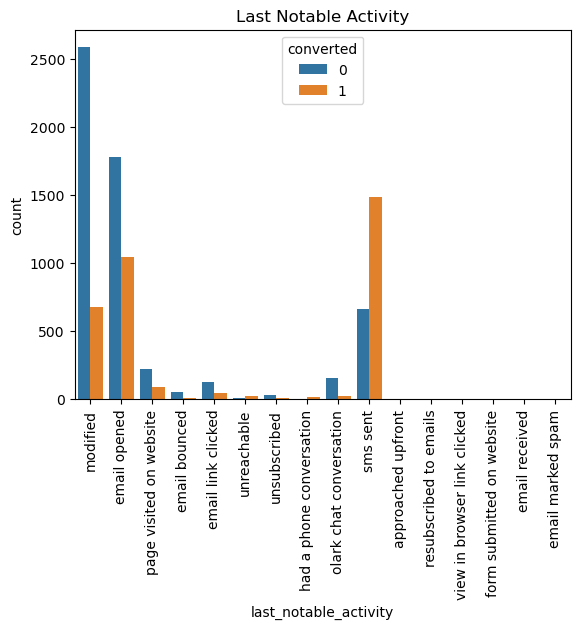

In [ ]:
sns.countplot(x='last_notable_activity', hue='converted', data = lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

###Checking correlation amongs different variable

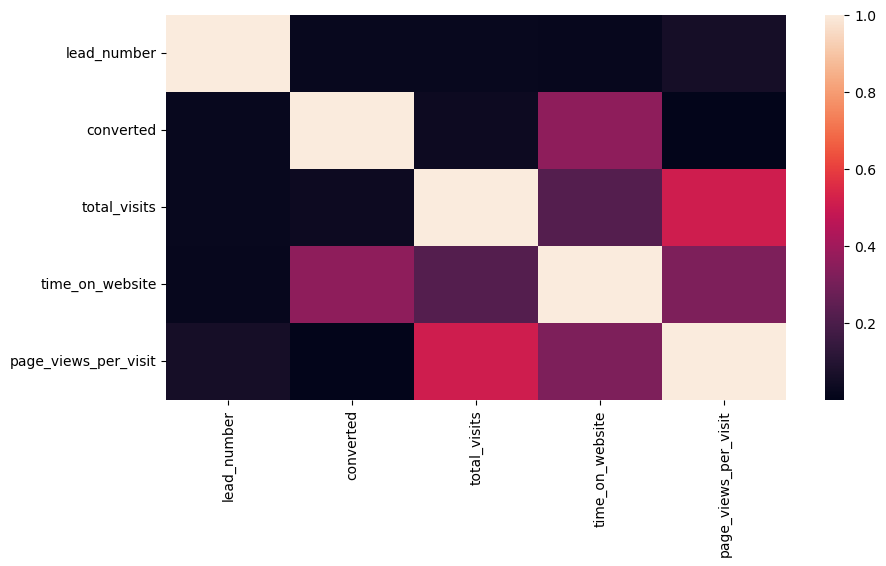

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(lead_df_final.corr())
plt.show()

###It is clear from the above EDA that many of the items contain scant information and will therefore we have less relevant to our research.

In [ ]:
numeric = lead_df_final[['total_visits','time_on_website','page_views_per_visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,total_visits,time_on_website,page_views_per_visit
count,9074.00,9074.00,9074.00
mean,3.46,482.89,2.37
std,4.86,545.26,2.16
min,0.00,0.00,0.00
25%,1.00,11.00,1.00
50%,3.00,246.00,2.00
75%,5.00,922.75,3.20
90%,7.00,1373.00,5.00
99%,17.00,1839.00,9.00
max,251.00,2272.00,55.00


###There aren't any major outliers.

##Dummy Variables

In [ ]:
lead_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lead_number              9074 non-null   int64  
 1   lead_origin              9074 non-null   object 
 2   lead_source              9074 non-null   object 
 3   do_not_email             9074 non-null   object 
 4   do_not_call              9074 non-null   object 
 5   converted                9074 non-null   int64  
 6   total_visits             9074 non-null   float64
 7   time_on_website          9074 non-null   int64  
 8   page_views_per_visit     9074 non-null   float64
 9   last_activity            9074 non-null   object 
 10  country                  9074 non-null   object 
 11  specialization           9074 non-null   object 
 12  occupation               9074 non-null   object 
 13  course_selection_reason  9074 non-null   object 
 14  search                  

In [ ]:
lead_df_final.loc[:, lead_df_final.dtypes == 'object'].columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'do_not_call',
       'last_activity', 'country', 'specialization', 'occupation',
       'course_selection_reason', 'search', 'newspaper_article',
       'x_education_forums', 'newspaper', 'digital_advertisement',
       'through_recommendations', 'mastering_interview',
       'last_notable_activity'],
      dtype='object')

###Creating dummy Variables

In [ ]:
dummy = pd.get_dummies(lead_df_final[['lead_origin','specialization' ,'lead_source',
                                 'do_not_email', 'last_notable_activity',
                                 'occupation','mastering_interview','last_activity']], drop_first=True)
lead_df_final_dum = pd.concat([lead_df_final, dummy], axis=1)
lead_df_final_dum.head()

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,occupation,course_selection_reason,search,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,mastering_interview,last_notable_activity,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_not provided,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,do_not_email_yes,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked,occupation_housewife,occupation_not provided,occupation_other,occupation_student,occupation_unemployed,occupation_working professional,mastering_interview_yes,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow
0,660737,api,olark chat,no,no,0,0.00,0,0.00,page visited on website,not provided,not provided,unemployed,better career prospects,no,no,no,no,no,no,no,modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,660728,api,organic search,no,no,0,5.00,674,2.50,email opened,india,not provided,unemployed,better career prospects,no,no,no,no,no,no,no,email opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,landing page submission,direct traffic,no,no,1,2.00,1532,2.00,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,yes,email opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,landing page submission,direct traffic,no,no,0,1.00,305,1.00,unreachable,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,no,modified,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [ ]:
lead_df_final_dum = lead_df_final_dum.drop(['occupation_not provided','lead_origin',
                                  'lead_source', 'do_not_email', 'do_not_call',
                                  'last_activity', 'country', 'specialization',
                                  'specialization_not provided',
                                  'occupation','course_selection_reason',
                                  'search','newspaper_article',
                                  'x_education_forums', 'newspaper',
                                  'digital_advertisement',
                                  'through_recommendations',
                                  'mastering_interview',
                                  'last_notable_activity'], 1)
lead_df_final_dum.head(1)

,lead_number,converted,total_visits,time_on_website,page_views_per_visit,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,do_not_email_yes,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked,occupation_housewife,occupation_other,occupation_student,occupation_unemployed,occupation_working professional,mastering_interview_yes,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow
0,660737,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
lead_df_final_dum.shape

(9074, 82)

###Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = lead_df_final_dum.drop(['converted'], 1)
X.head()

,lead_number,total_visits,time_on_website,page_views_per_visit,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,do_not_email_yes,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked,occupation_housewife,occupation_other,occupation_student,occupation_unemployed,occupation_working professional,mastering_interview_yes,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow
0,660737,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,660728,5.00,674,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,2.00,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,1.00,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,660681,2.00,1428,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df_final_dum['converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

###Splitting the dataset in 70 and 30 percent for trainning and test respectively

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['total_visits', 'page_views_per_visit', 'time_on_website']] = scaler.fit_transform(X_train[['total_visits', 'page_views_per_visit', 'time_on_website']])
X_train.head()

,lead_number,total_visits,time_on_website,page_views_per_visit,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,do_not_email_yes,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked,occupation_housewife,occupation_other,occupation_student,occupation_unemployed,occupation_working professional,mastering_interview_yes,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow
1289,646334,0.01,0.61,0.08,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3604,625970,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5584,607128,0.04,0.75,0.25,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7679,590921,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7563,591639,0.01,0.79,0.08,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


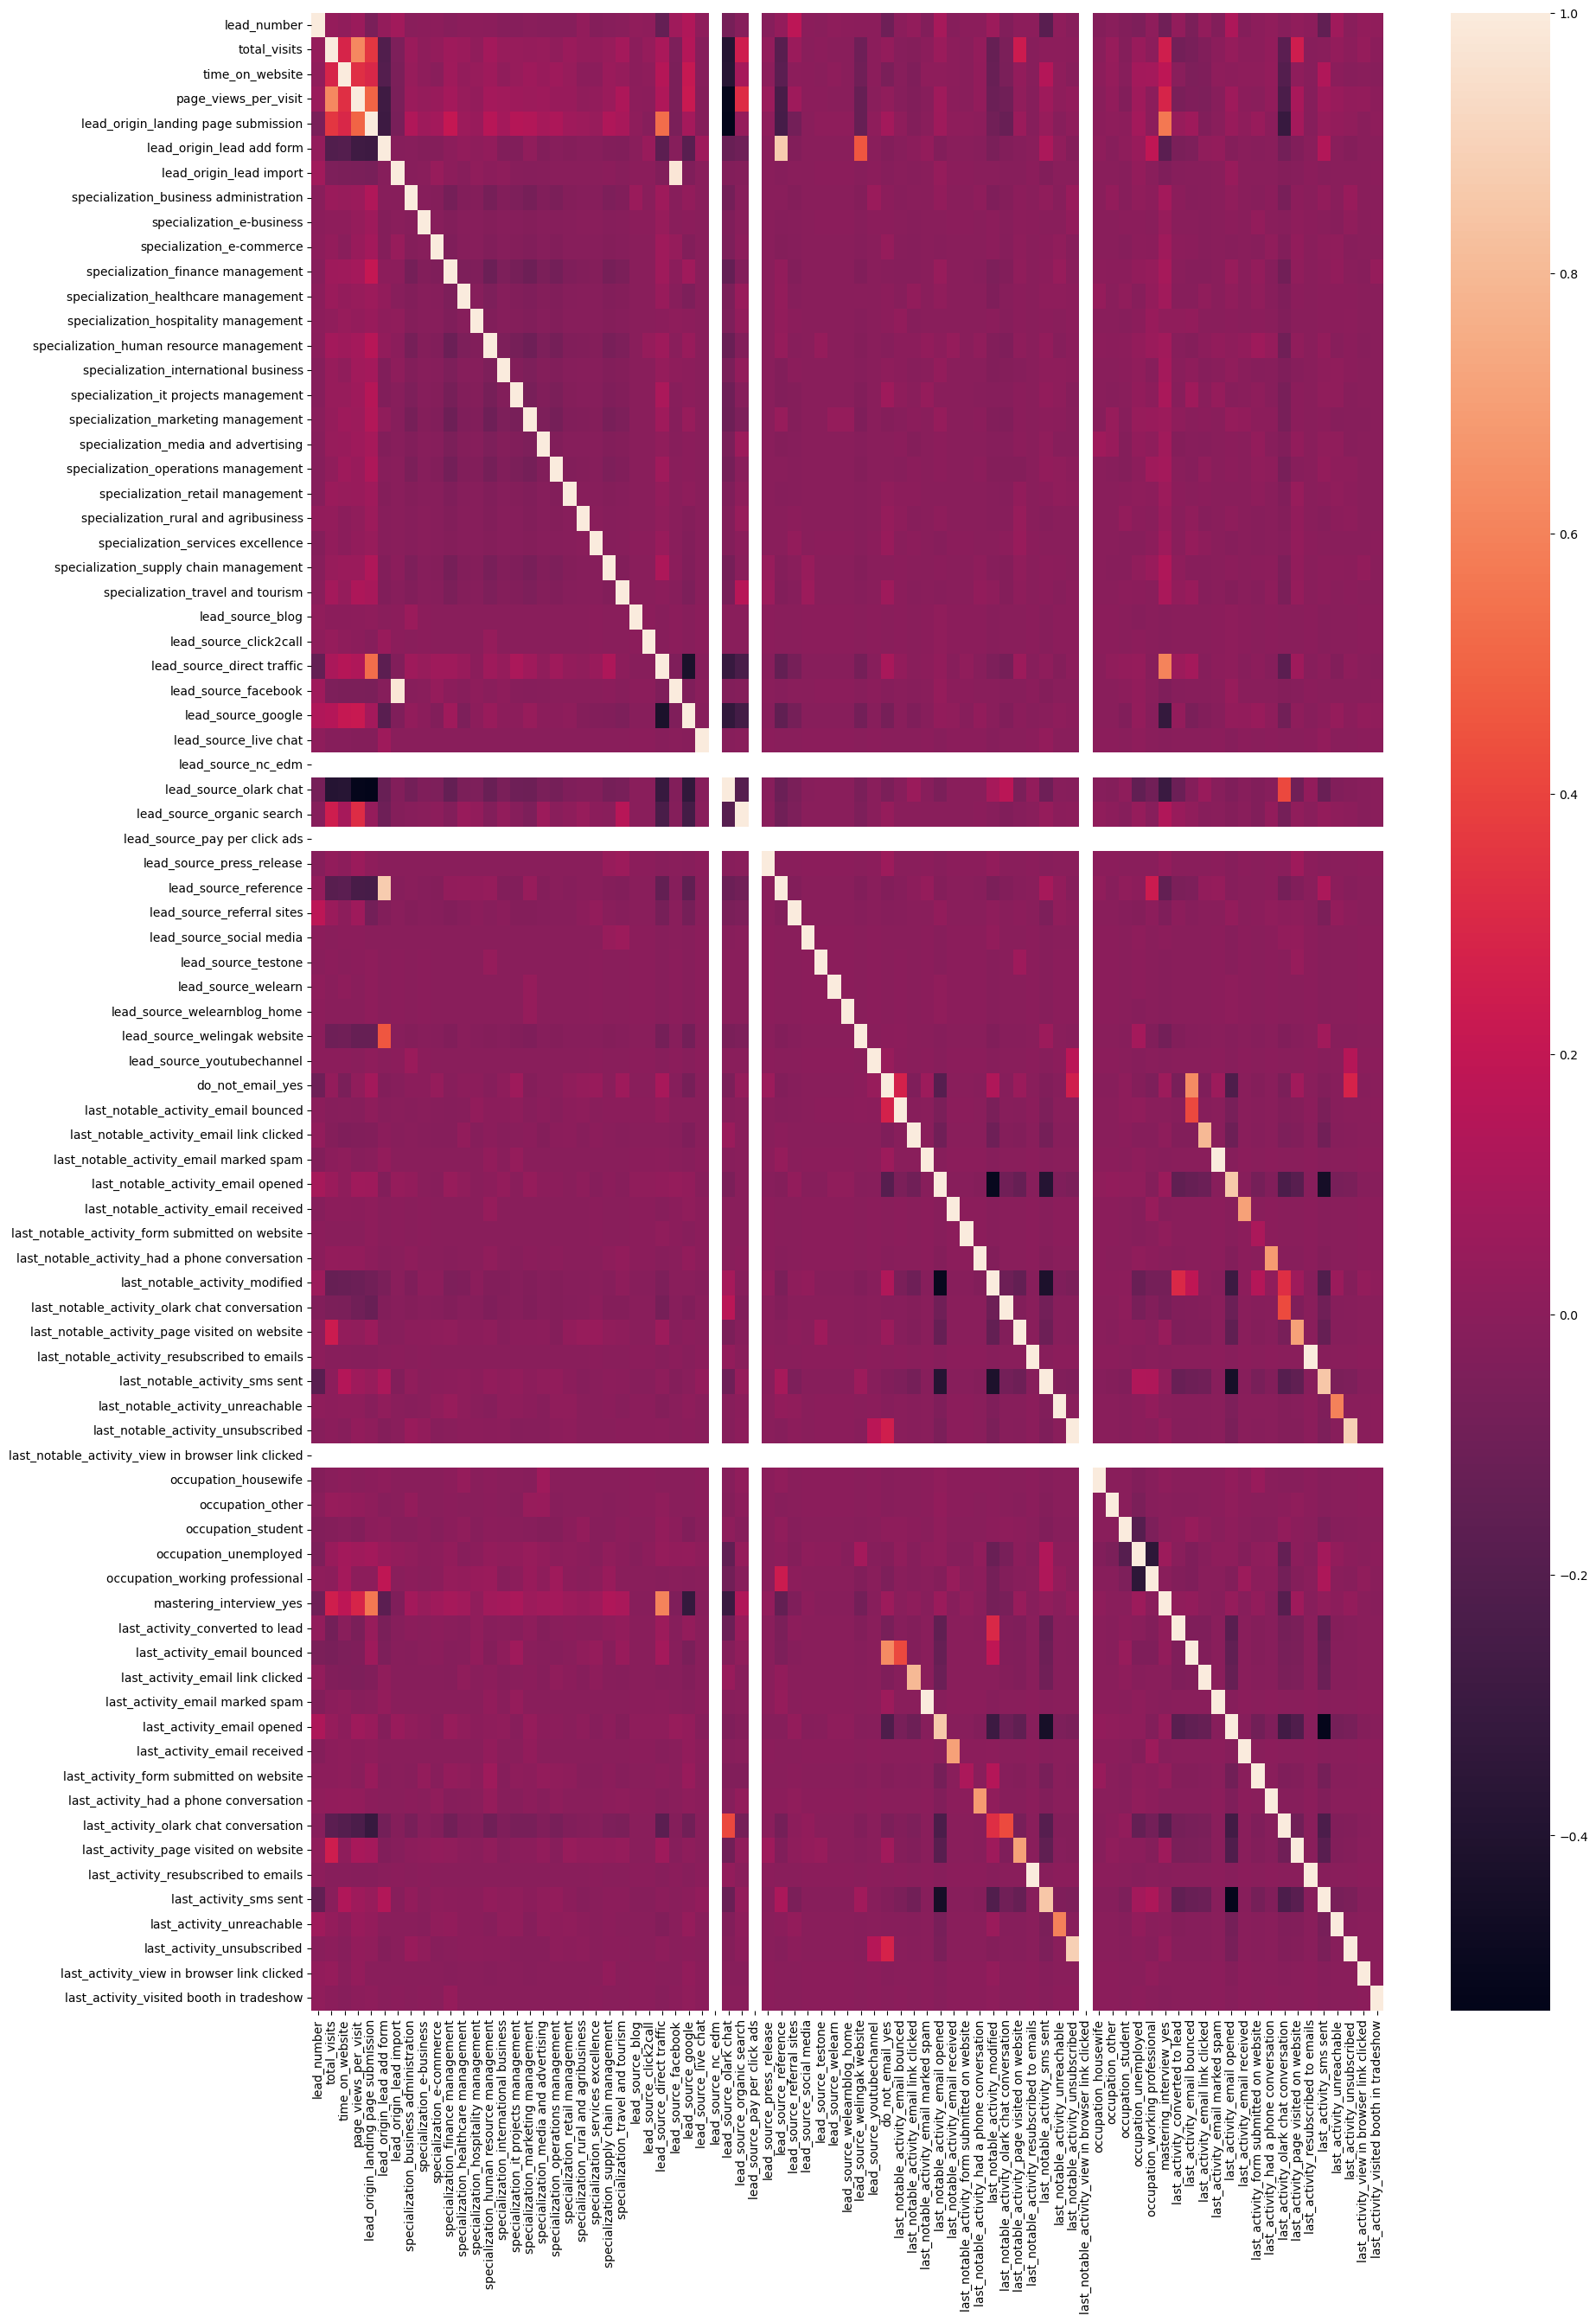

In [ ]:
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

###It is challenging to eliminate variables since there are so many of them. After RFE, we'll proceed.

### Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('lead_number', True, 1),
 ('total_visits', False, 34),
 ('time_on_website', True, 1),
 ('page_views_per_visit', False, 39),
 ('lead_origin_landing page submission', True, 1),
 ('lead_origin_lead add form', True, 1),
 ('lead_origin_lead import', False, 44),
 ('specialization_business administration', False, 23),
 ('specialization_e-business', False, 40),
 ('specialization_e-commerce', False, 31),
 ('specialization_finance management', False, 12),
 ('specialization_healthcare management', False, 17),
 ('specialization_hospitality management', False, 30),
 ('specialization_human resource management', False, 8),
 ('specialization_international business', False, 32),
 ('specialization_it projects management', False, 33),
 ('specialization_marketing management', False, 7),
 ('specialization_media and advertising', False, 38),
 ('specialization_operations management', False, 11),
 ('specialization_retail management', False, 43),
 ('specialization_rural and agribusiness', False, 50),
 ('spec

In [ ]:
col = X_train.columns[rfe.support_]

### All the variables are selected by RFE, next statistics thing to do is p-values and the VIFs.

In [ ]:
X_train = X_train[col]

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.5
Date:                Mon, 14 Aug 2023   Deviance:                       5227.1
Time:                        16:15:34   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4004
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -7.7646      0.992     -7.830      0.000      -9.708      -5.821
lead_number                            8.198e-06   1.57e-06      5.235      0.000    5.13e-06    1.13e-05
time_on_website                           4.6477      0.167     27.818      0.000       4.320       4.975
lead_origin_landing page submission      -0.1699      0.098     -1.741      0.082      -0.361       0.021
lead_origin_lead add form                 5.2351      0.727      7.204      0.000       3.811       6.659
lead_source_direct traffic               -0.2202      0.090     -2.437      0.015      -0.397      -0.043
lead_source_olark chat                    1.2035      0.122      9.893      0.000       0.965       1.442
lead_source_reference                    -1.7145      0.753     -2.278      0.023      -3.190      -0.239
do_not_email_yes                         -1.0906      0.200     -5.441      0.000      -1.483      -0.698
last_notable_activity_modified           -0.6002      0.096     -6.283      0.000      -0.787      -0.413
last_notable_activity_sms sent            0.5816      0.181      3.209      0.001       0.226       0.937
occupation_unemployed                     0.9479      0.082     11.577      0.000       0.787       1.108
occupation_working professional           3.5117      0.206     17.084      0.000       3.109       3.915
last_activity_email bounced              -0.5834      0.386     -1.510      0.131      -1.341       0.174
last_activity_olark chat conversation    -1.1751      0.175     -6.723      0.000      -1.518      -0.833
last_activity_sms sent                    0.7565      0.161      4.713      0.000       0.442       1.071
=========================================================================================================
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,lead_number,9.97
9,last_notable_activity_sms sent,6.69
14,last_activity_sms sent,6.51
3,lead_origin_lead add form,4.80
2,lead_origin_landing page submission,4.51
6,lead_source_reference,4.41
10,occupation_unemployed,3.21
8,last_notable_activity_modified,2.49
1,time_on_website,2.35
5,lead_source_olark chat,2.34


'last_activity_email bounced' can be removed based on p-values.

In [ ]:
X_train.drop('last_activity_email bounced', axis = 1, inplace = True)

In [ ]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.8
Date:                Mon, 14 Aug 2023   Deviance:                       5229.5
Time:                        16:15:35   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4002
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -7.7488      0.991     -7.818      0.000      -9.692      -5.806
lead_number                            8.171e-06   1.57e-06      5.221      0.000     5.1e-06    1.12e-05
time_on_website                           4.6474      0.167     27.830      0.000       4.320       4.975
lead_origin_landing page submission      -0.1711      0.098     -1.754      0.079      -0.362       0.020
lead_origin_lead add form                 5.2316      0.726      7.206      0.000       3.809       6.655
lead_source_direct traffic               -0.2221      0.090     -2.458      0.014      -0.399      -0.045
lead_source_olark chat                    1.1980      0.122      9.854      0.000       0.960       1.436
lead_source_reference                    -1.6986      0.752     -2.259      0.024      -3.172      -0.225
do_not_email_yes                         -1.2500      0.174     -7.167      0.000      -1.592      -0.908
last_notable_activity_modified           -0.6170      0.095     -6.504      0.000      -0.803      -0.431
last_notable_activity_sms sent            0.5665      0.181      3.127      0.002       0.211       0.922
occupation_unemployed                     0.9498      0.082     11.602      0.000       0.789       1.110
occupation_working professional           3.5072      0.205     17.103      0.000       3.105       3.909
last_activity_olark chat conversation    -1.1575      0.174     -6.635      0.000      -1.499      -0.816
last_activity_sms sent                    0.7818      0.160      4.890      0.000       0.468       1.095
=========================================================================================================
"""

###Making VIF data frame for variables present

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,lead_number,9.97
9,last_notable_activity_sms sent,6.61
13,last_activity_sms sent,6.35
3,lead_origin_lead add form,4.80
2,lead_origin_landing page submission,4.51
6,lead_source_reference,4.41
10,occupation_unemployed,3.21
8,last_notable_activity_modified,2.41
1,time_on_website,2.35
5,lead_source_olark chat,2.34


###Highest value of VIF if of 'lead_number', so we remove it.

In [ ]:
X_train.drop('lead_number', axis = 1, inplace = True)

###Refitting the model

In [ ]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.5
Date:                Mon, 14 Aug 2023   Deviance:                       5257.0
Time:                        16:15:35   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3976
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.6282      0.118    -22.252      0.000      -2.860      -2.397
time_on_website                           4.6411      0.167     27.852      0.000       4.314       4.968
lead_origin_landing page submission      -0.1941      0.097     -1.993      0.046      -0.385      -0.003
lead_origin_lead add form                 5.2290      0.727      7.190      0.000       3.804       6.654
lead_source_direct traffic               -0.2815      0.089     -3.148      0.002      -0.457      -0.106
lead_source_olark chat                    1.1194      0.120      9.318      0.000       0.884       1.355
lead_source_reference                    -1.7227      0.753     -2.289      0.022      -3.198      -0.248
do_not_email_yes                         -1.3118      0.174     -7.548      0.000      -1.652      -0.971
last_notable_activity_modified           -0.5998      0.095     -6.343      0.000      -0.785      -0.414
last_notable_activity_sms sent            0.4912      0.180      2.732      0.006       0.139       0.844
occupation_unemployed                     0.9417      0.082     11.502      0.000       0.781       1.102
occupation_working professional           3.4913      0.204     17.102      0.000       3.091       3.891
last_activity_olark chat conversation    -1.1789      0.174     -6.774      0.000      -1.520      -0.838
last_activity_sms sent                    0.7625      0.159      4.794      0.000       0.451       1.074
=========================================================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,last_notable_activity_sms sent,6.57
12,last_activity_sms sent,6.35
2,lead_origin_lead add form,4.63
5,lead_source_reference,4.41
1,lead_origin_landing page submission,3.33
9,occupation_unemployed,2.59
7,last_notable_activity_modified,2.16
0,time_on_website,2.03
3,lead_source_direct traffic,1.94
11,last_activity_olark chat conversation,1.59


In [ ]:
X_train.drop('lead_origin_landing page submission', axis = 1, inplace = True)

In [ ]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.5
Date:                Mon, 14 Aug 2023   Deviance:                       5261.0
Time:                        16:15:35   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3972
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.7403      0.105    -26.196      0.000      -2.945      -2.535
time_on_website                           4.6398      0.167     27.845      0.000       4.313       4.966
lead_origin_lead add form                 5.3463      0.725      7.375      0.000       3.925       6.767
lead_source_direct traffic               -0.3523      0.082     -4.299      0.000      -0.513      -0.192
lead_source_olark chat                    1.2311      0.107     11.516      0.000       1.022       1.441
lead_source_reference                    -1.7226      0.753     -2.289      0.022      -3.198      -0.248
do_not_email_yes                         -1.3157      0.173     -7.587      0.000      -1.656      -0.976
last_notable_activity_modified           -0.5946      0.095     -6.290      0.000      -0.780      -0.409
last_notable_activity_sms sent            0.4939      0.180      2.750      0.006       0.142       0.846
occupation_unemployed                     0.9350      0.082     11.440      0.000       0.775       1.095
occupation_working professional           3.4749      0.204     17.041      0.000       3.075       3.875
last_activity_olark chat conversation    -1.1532      0.174     -6.645      0.000      -1.493      -0.813
last_activity_sms sent                    0.7589      0.159      4.776      0.000       0.447       1.070
=========================================================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,last_notable_activity_sms sent,6.57
11,last_activity_sms sent,6.35
1,lead_origin_lead add form,4.56
4,lead_source_reference,4.41
8,occupation_unemployed,2.29
6,last_notable_activity_modified,2.10
0,time_on_website,1.91
10,last_activity_olark chat conversation,1.58
3,lead_source_olark chat,1.51
2,lead_source_direct traffic,1.44


###Highest value of VIF is 'last_notable_activity_sms sent' so removing it.

In [ ]:
X_train.drop('last_notable_activity_sms sent', axis = 1, inplace = True)

In [ ]:
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.3
Date:                Mon, 14 Aug 2023   Deviance:                       5268.6
Time:                        16:15:35   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3965
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.7194      0.104    -26.120      0.000      -2.923      -2.515
time_on_website                           4.6363      0.167     27.829      0.000       4.310       4.963
lead_origin_lead add form                 5.2919      0.724      7.311      0.000       3.873       6.711
lead_source_direct traffic               -0.3510      0.082     -4.290      0.000      -0.511      -0.191
lead_source_olark chat                    1.2266      0.107     11.499      0.000       1.018       1.436
lead_source_reference                    -1.6872      0.752     -2.244      0.025      -3.161      -0.213
do_not_email_yes                         -1.2976      0.173     -7.494      0.000      -1.637      -0.958
last_notable_activity_modified           -0.7342      0.081     -9.101      0.000      -0.892      -0.576
occupation_unemployed                     0.9611      0.081     11.849      0.000       0.802       1.120
occupation_working professional           3.5034      0.204     17.164      0.000       3.103       3.903
last_activity_olark chat conversation    -1.0868      0.172     -6.311      0.000      -1.424      -0.749
last_activity_sms sent                    1.1444      0.074     15.425      0.000       0.999       1.290
=========================================================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,lead_origin_lead add form,4.56
4,lead_source_reference,4.41
7,occupation_unemployed,2.20
0,time_on_website,1.91
6,last_notable_activity_modified,1.59
10,last_activity_sms sent,1.54
9,last_activity_olark chat conversation,1.53
3,lead_source_olark chat,1.51
2,lead_source_direct traffic,1.44
8,occupation_working professional,1.30


All the VIF values are good and all the p-values are below 0.05. So we can fix model.

### Making Prediction

In [ ]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289   0.75
3604   0.18
5584   0.37
7679   0.18
7563   0.47
7978   0.80
7780   0.17
7863   0.97
838    0.73
708    0.11
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.74693   , 0.18351474, 0.37013422, 0.18351474, 0.46572124,
       0.80221781, 0.17041007, 0.97163114, 0.72637268, 0.11327371])

###Data frame with given convertion rate and probablity of predicted ones

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.75
1,0,0.18
2,0,0.37
3,0,0.18
4,0,0.47


In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.75,1
1,0,0.18,0
2,0,0.37,0
3,0,0.18,0
4,0,0.47,0


### Model Evaluation

In [ ]:
from sklearn import metrics

### Creating Matric confusion

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3460,  435],
       [ 740, 1716]], dtype=int64)



```
Predicted     not_churn    churn
Actual
not_churn        3460       435
churn             740      1716
```




###Checking the accuracy

In [ ]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.814989765391277

###Accuracy is around 81.49% which is a very good value.

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

C

###Calculating the sensitivity

In [ ]:
TP/(TP+FN)

0.6986970684039088

###Sensitivity is around 70%

In [ ]:
TN/(TN+FP)

0.8883183568677792

 ### Specificity of around 89%.

### Optimise Cut off (ROC Curve)

###The prior cutoff was chosen at random. Now to choose the best one

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

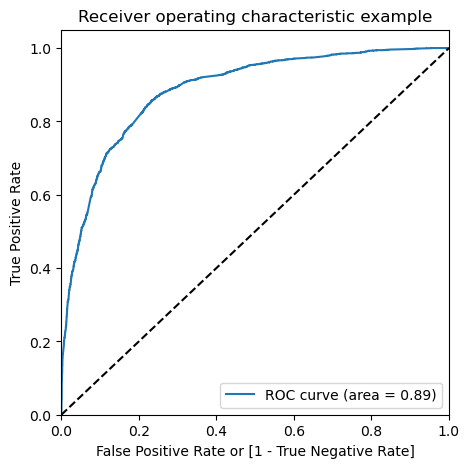

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

###An excellent number thats 0.89, represents the area under the ROC curve.


In [ ]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.75,1,1,1,1,1,1,1,1,1,0,0
1,0,0.18,0,1,1,0,0,0,0,0,0,0,0
2,0,0.37,0,1,1,1,1,0,0,0,0,0,0
3,0,0.18,0,1,1,0,0,0,0,0,0,0,0
4,0,0.47,0,1,1,1,1,1,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.00,0.00,0.39,1.00,0.00
0.10,0.10,0.62,0.97,0.40
0.20,0.20,0.76,0.91,0.66
0.30,0.30,0.80,0.86,0.76
0.40,0.40,0.81,0.78,0.83
0.50,0.50,0.81,0.70,0.89
0.60,0.60,0.80,0.63,0.91
0.70,0.70,0.78,0.51,0.95
0.80,0.80,0.75,0.41,0.97
0.90,0.90,0.71,0.27,0.99


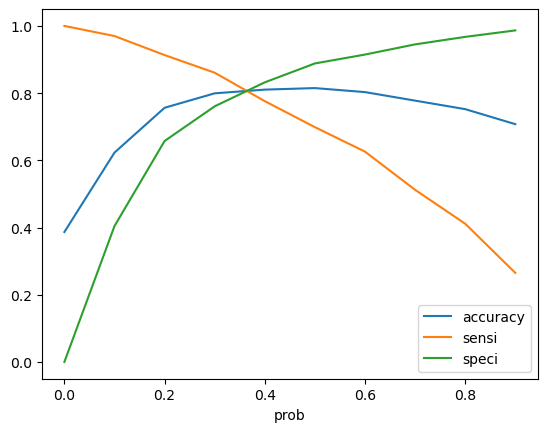

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph we can see that the optimal cut off is nearby 0.38.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.75,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.18,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.37,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.18,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.47,0,1,1,1,1,1,0,0,0,0,0,1


In [ ]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8088490001574555

###Overall Accuracy is at 80%

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3203,  692],
       [ 522, 1934]], dtype=int64)

In [ ]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [ ]:
TP/(TP+FN)

0.7874592833876222

In [ ]:
TN/(TN+FP)

0.8223363286264441

###Accuracy, sensitivity, and specificity are all around 80% with the current cut off of 0.38.

In [ ]:
X_test.head()

,lead_number,total_visits,time_on_website,page_views_per_visit,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,do_not_email_yes,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked,occupation_housewife,occupation_other,occupation_student,occupation_unemployed,occupation_working professional,mastering_interview_yes,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow
8308,586397,5.00,947,5.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7212,594083,4.00,3,4.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2085,639518,0.00,0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4048,621209,4.00,1402,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4790,614037,4.00,12,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


###Prediction on Test set

In [ ]:
X_test[['total_visits', 'page_views_per_visit', 'time_on_website']] = scaler.transform(X_test[['total_visits', 'page_views_per_visit', 'time_on_website']])

In [ ]:
col = X_train.columns

In [ ]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,time_on_website,lead_origin_lead add form,lead_source_direct traffic,lead_source_olark chat,lead_source_reference,do_not_email_yes,last_notable_activity_modified,occupation_unemployed,occupation_working professional,last_activity_olark chat conversation,last_activity_sms sent
8308,1.00,0.42,0,1,0,0,0,1,1,0,0,0
7212,1.00,0.00,0,0,0,0,0,0,0,1,0,1
2085,1.00,0.00,1,0,0,0,0,0,1,0,0,0
4048,1.00,0.62,0,1,0,0,0,0,1,0,0,1
4790,1.00,0.01,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.00,0.00,0,0,1,0,0,1,1,0,1,0
8179,1.00,0.15,0,0,0,0,0,1,0,0,0,1
6236,1.00,0.00,0,0,1,0,0,0,0,0,0,0
5240,1.00,0.46,0,0,0,0,0,0,1,0,0,1


In [ ]:
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,converted,Conversion_Prob
0,0,0.29
1,1,0.87
2,1,0.97
3,1,0.87
4,0,0.11


###Making Prediction

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final

,converted,Conversion_Prob,final_predicted
0,0,0.29,0
1,1,0.87,1
2,1,0.97,1
3,1,0.87,1
4,0,0.11,0
...,...,...,...
2718,1,0.09,0
2719,0,0.17,0
2720,0,0.18,0
2721,1,0.82,1


In [ ]:
metrics.accuracy_score(y_pred_final['converted'], y_pred_final.final_predicted)

0.8163789937568858

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['converted'], y_pred_final.final_predicted )
confusion2

array([[1446,  298],
       [ 202,  777]], dtype=int64)

In [ ]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [ ]:
TP/(TP+FN)

0.7936670071501533

In [ ]:
TN/(TN+FP)

0.8291284403669725

With the current cut off as 0.38 we have accuracy, sensitivity and specificity of around 80%.

###Precision-Recall

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3460,  435],
       [ 740, 1716]], dtype=int64)

In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.797768479776848

In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6986970684039088

###We have Precision around 79.7% and Recall around 70%

###Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

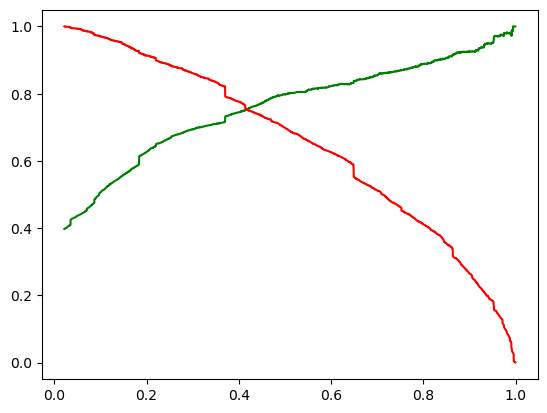

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.75,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.18,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.37,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.18,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.47,0,1,1,1,1,1,0,0,0,0,0,1


In [ ]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8113682884585105

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3262,  633],
       [ 565, 1891]], dtype=int64)

In [ ]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [ ]:
TP / (TP + FP)

0.7492076069730587

In [ ]:
TP / (TP + FN)

0.7699511400651465

###With the current cut off as 0.41 we have Precision around 75% and Recall around 77%

### Prediction on Test set

In [ ]:
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,converted,Conversion_Prob
0,0,0.29
1,1,0.87
2,1,0.97
3,1,0.87
4,0,0.11


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,converted,Conversion_Prob,final_predicted
0,0,0.29,0
1,1,0.87,1
2,1,0.97,1
3,1,0.87,1
4,0,0.11,0
...,...,...,...
2718,1,0.09,0
2719,0,0.17,0
2720,0,0.18,0
2721,1,0.82,1


In [ ]:
metrics.accuracy_score(y_pred_final['converted'], y_pred_final.final_predicted)

0.8174807197943444

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['converted'], y_pred_final.final_predicted )
confusion2

array([[1471,  273],
       [ 224,  755]], dtype=int64)

In [ ]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [ ]:
TP / (TP + FP)

0.7344357976653697

In [ ]:
TP / (TP + FN)

0.7711950970377937

###With the current cut off as 0.41 we have Precision around 73.4% and Recall around 77%.

### We concluded that :



```
According to research, the factors that affected potential customers the most were :
1. The total time spend on the Website.
2. Total number of visits.
3. When the lead source was:
  a.	Google
  b.	Direct traffic
  c.	Organic search
  d.	Welingak website
4. When the last activity was:
  a.	SMS
  b.	Olark chat conversation
5. When the lead origin is Lead add format.
6. When their current occupation is as a working professional.
With these in mind, X Education can succeed since they have a very good probability of persuading nearly all prospective customers to change their minds and purchase their courses.
```


